# Titanic Survival Prediction
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [893]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [894]:
from sklearn import metrics

In [895]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [896]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# The Data
**Variable Notes**
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- ticket:	Ticket number	
- fare:	Passenger fare	
- cabin:	Cabin number	
- embarked	
    - Port of Embarkation:	
        - C = Cherbourg, 
        - Q = Queenstown, 
        - S = Southampton    

## Getting file

In [897]:
file = pd.read_csv('titanic-training-data.csv')

In [898]:
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data preparation

In [899]:
file.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lobb, Mr. William Arthur",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [900]:
file.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

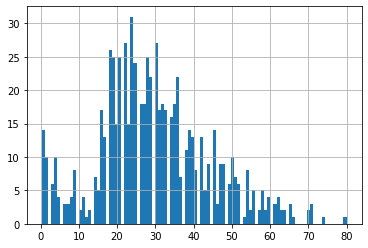

In [901]:
file['Age'].hist(bins=100)

In [902]:
file = file.drop(columns=['Cabin','Ticket','PassengerId','Name'])

In [903]:
file

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [904]:
file.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [905]:
file['Survived'].dtype

dtype('int64')

In [906]:
file['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [907]:
file['Embarked'] = file['Embarked'].fillna(file['Embarked'].mode()[0])
#file['Sex'] = file['Sex'].fillna(file['Sex'].mode()[0])

In [908]:
#file['Fare'] = file['Fare'].fillna(file['Fare'].mean())

In [909]:
filler = lambda x: x.fillna(x.median())
file[['SibSp','Parch','Age']] = file[['SibSp','Parch','Age']].apply(filler,axis=0)

In [910]:
file

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [911]:
file['Sex'] = np.where(file['Sex']=='male',1,0)

In [912]:
file['S'] = np.where(file['Embarked']=='S',1,0)
file['C'] = np.where(file['Embarked']=='C',1,0)
file['Q'] = np.where(file['Embarked']=='Q',1,0)

In [913]:
file['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [914]:
#file['Pclass1'] = np.where(file['Pclass']==1,1,0)
#file['Pclass2'] = np.where(file['Pclass']==2,1,0)
#file['Pclass3'] = np.where(file['Pclass']==3,1,0)

In [915]:
file = file.drop(['Embarked'],axis=1)

In [916]:
#file = file.drop(['Pclass'],axis=1)

In [917]:
file.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,S,C,Q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.725028,0.188552,0.086420
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.446751,0.391372,0.281141
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [918]:
file[['S','Q','C']].sum()

S    646
Q     77
C    168
dtype: int64

In [919]:
#dropping linearly dependent Q column
file = file.drop(['S'],axis=1)

## Data Analysis

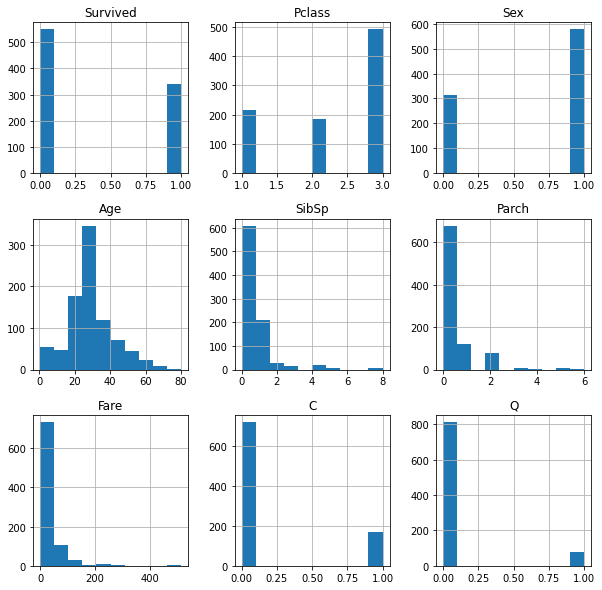

In [920]:
file.hist(figsize=(10,10));

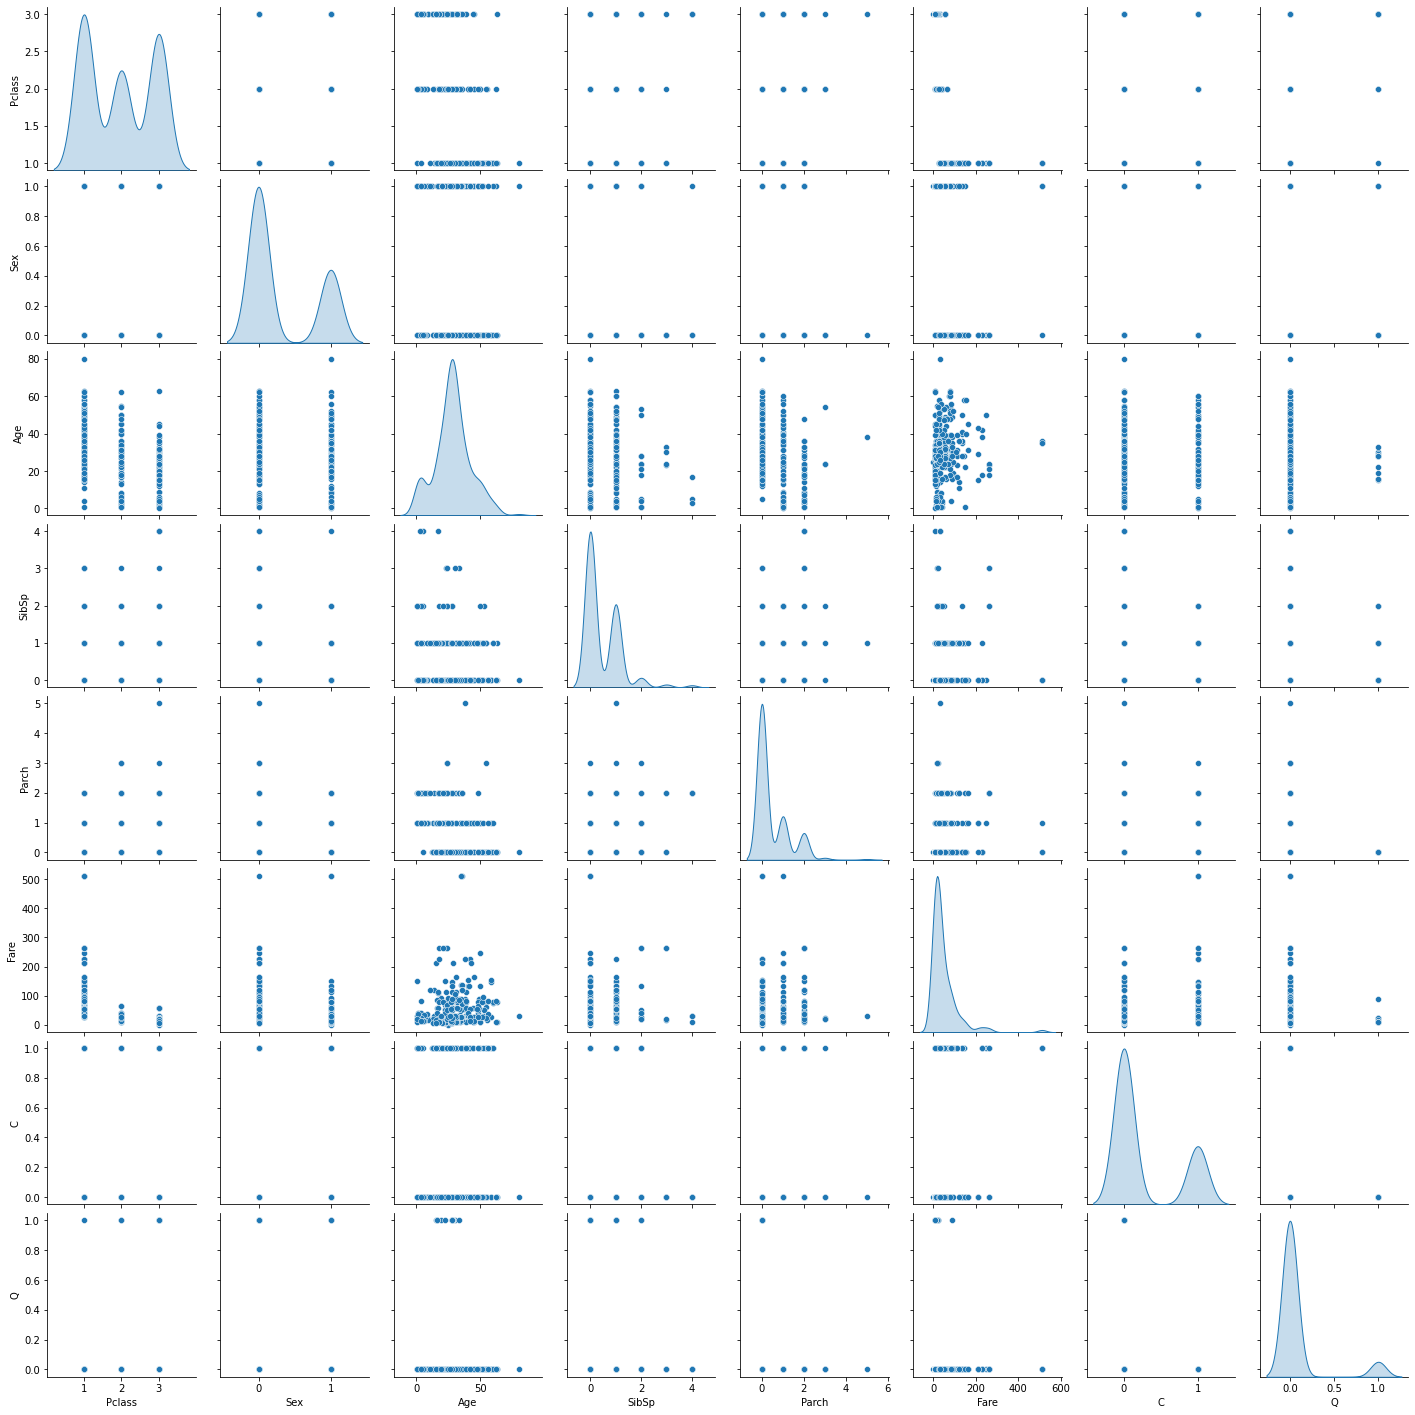

In [921]:
sns.pairplot(file[file['Survived']==1].drop(['Survived'],axis=1),diag_kind = 'kde');

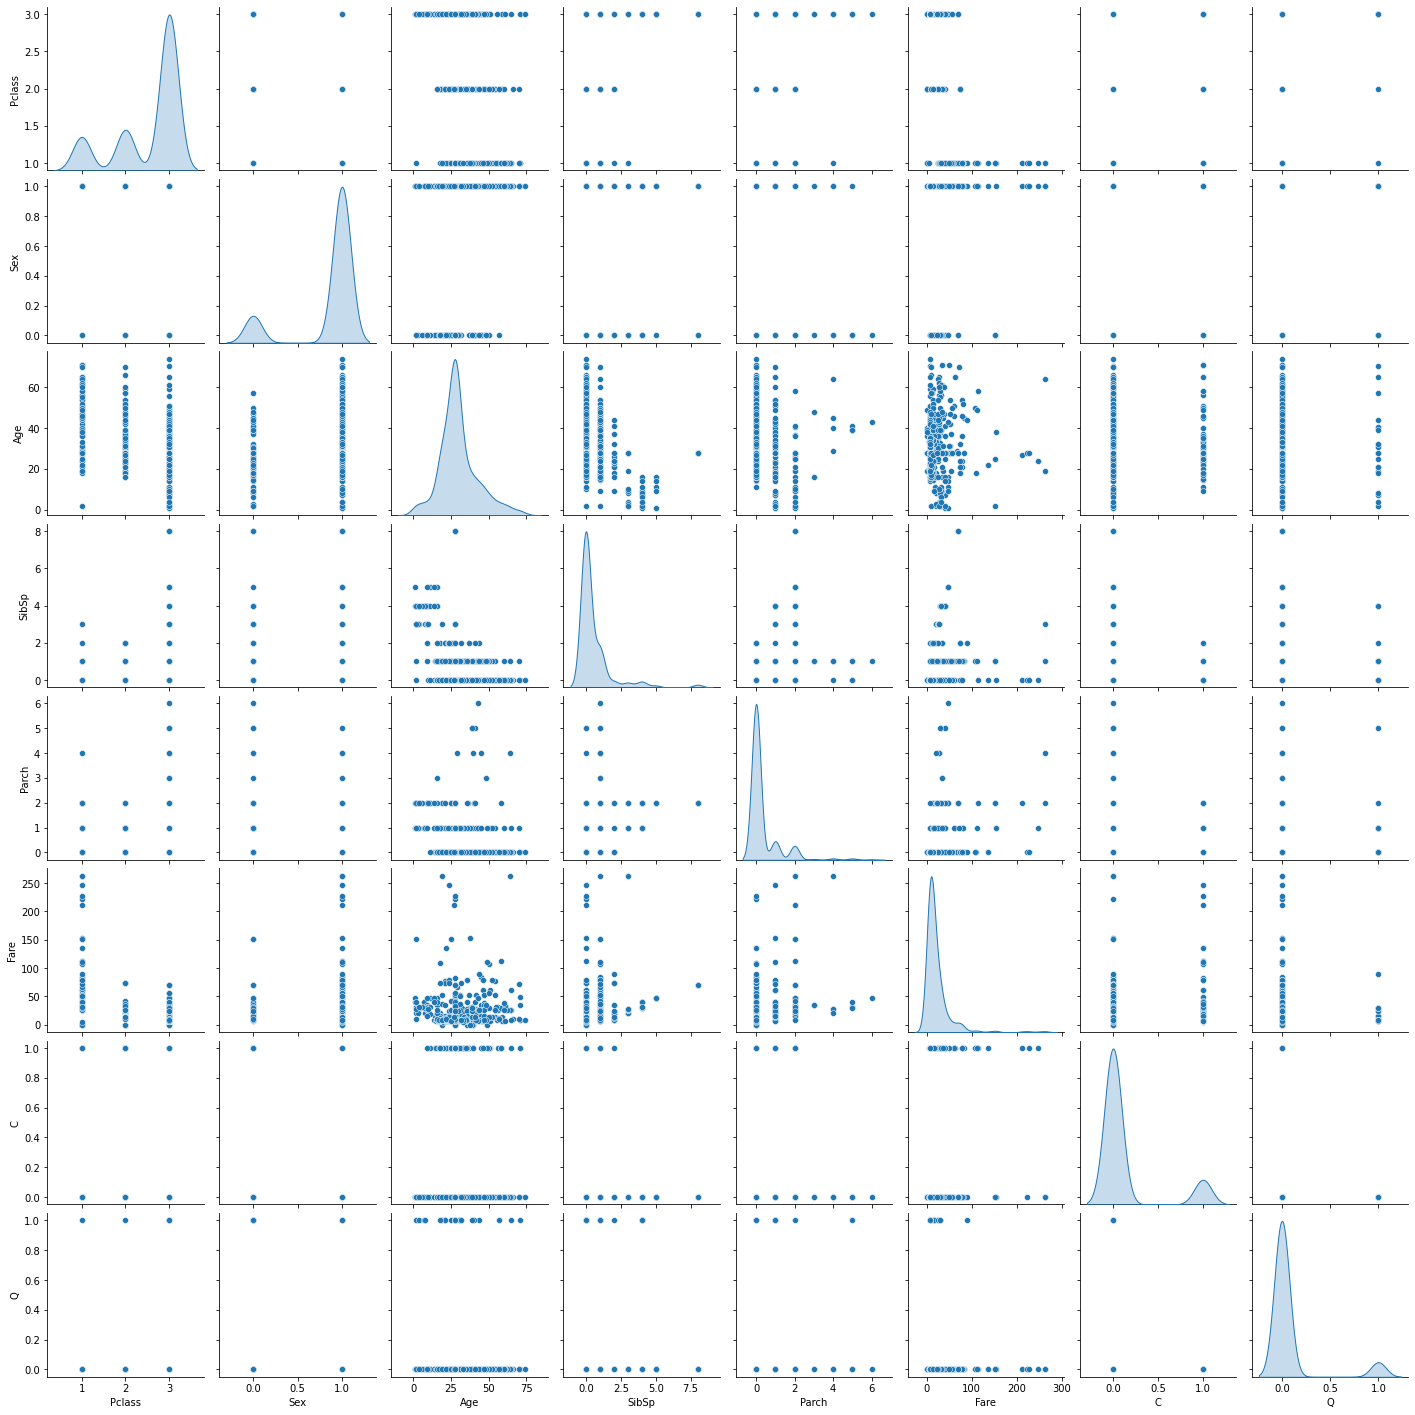

In [922]:
sns.pairplot(file[file['Survived']==0].drop(['Survived'],axis=1),diag_kind = 'kde');

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

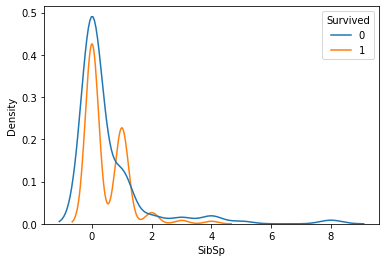

In [923]:
sns.kdeplot(data=file,x = 'SibSp',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

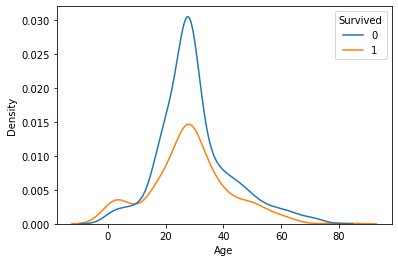

In [924]:
sns.kdeplot(data=file,x = 'Age',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Density'>

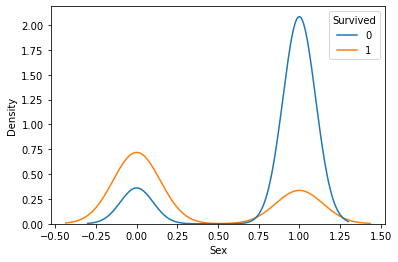

In [925]:
sns.kdeplot(data=file,x = 'Sex',hue='Survived')

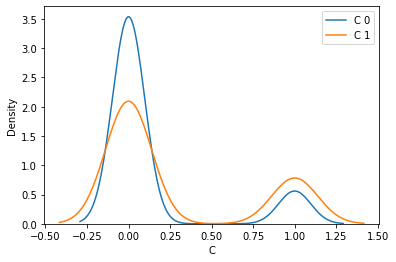

In [926]:
sns.kdeplot(data=file[file['Survived']==0],x='C',label = 'C 0')
sns.kdeplot(data=file[file['Survived']==1],x='C',label = 'C 1')
#sns.kdeplot(data=file[file['Survived']==0],x='Q',label = 'Q 0')
#sns.kdeplot(data=file[file['Survived']==1],x='Q',label = 'Q 1')
plt.legend()
#sns.kdeplot(data=file[file['Survived']==1][['Q','C']])

In [927]:
corr = file.corr()

In [928]:
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216
C,0.168240,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258
Q,0.003650,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000


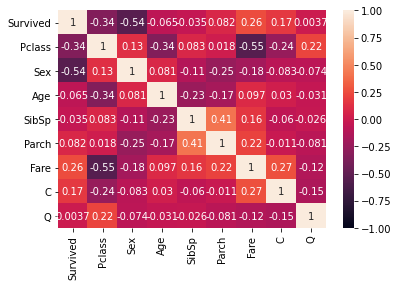

In [929]:
sns.heatmap(corr,annot=True,vmin=-1,vmax=1);

# Analysis Inference
We see that the Survival depends on the following columns:
1. Pclass (strong)
2. Sex (strong)
3. SibSp (mild)
4. Age(mild)
5. C (very mild)

In [930]:
file = file[['Pclass','Sex','SibSp','Age','C','Survived']]

<AxesSubplot:>

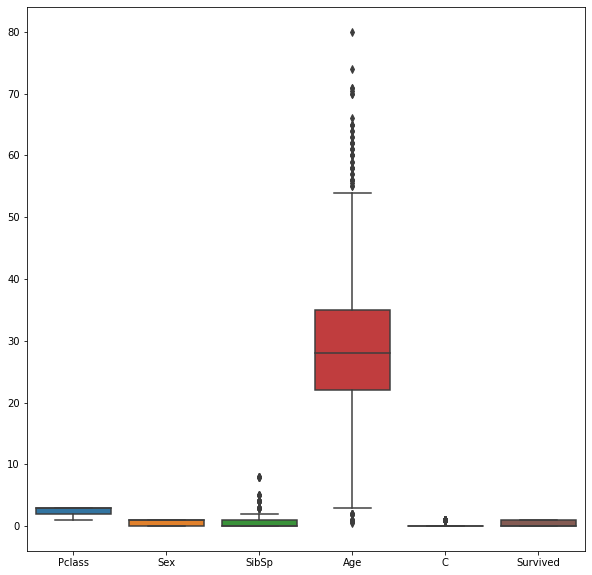

In [931]:
plt.figure(figsize=(10,10));
sns.boxplot(data=file)

<AxesSubplot:>

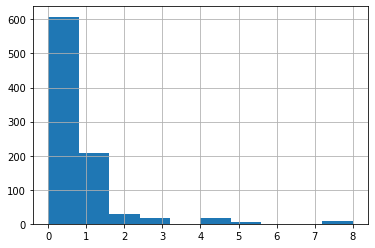

In [932]:
file['SibSp'].hist()

In [933]:
file['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [934]:
SibSp8 = file['SibSp'][file['SibSp']==8].count()

In [935]:
SibSpTot = file['SibSp'].count()

In [936]:
print("%SibSp is 8 = {}%".format(SibSp8*100/SibSpTot))

%SibSp is 8 = 0.7856341189674523%


In [937]:
SibSp5 = file['SibSp'][file['SibSp']==5].count()

In [938]:
print("%SibSp is 5 = {}%".format(SibSp5*100/SibSpTot))

%SibSp is 5 = 0.5611672278338945%


In [939]:
SibSp4 = file['SibSp'][file['SibSp']==4].count()

In [940]:
print("%SibSp is 4 = {}%".format(SibSp4*100/SibSpTot))

%SibSp is 4 = 2.0202020202020203%


This means that we can remove these outliers since they are a small proportion of the data

In [941]:
file = file[file['SibSp']<3]

<AxesSubplot:ylabel='SibSp'>

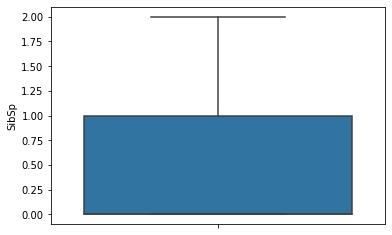

In [942]:
sns.boxplot(y = 'SibSp',data=file)

<AxesSubplot:>

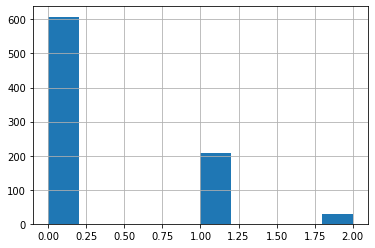

In [943]:
file['SibSp'].hist()

<AxesSubplot:>

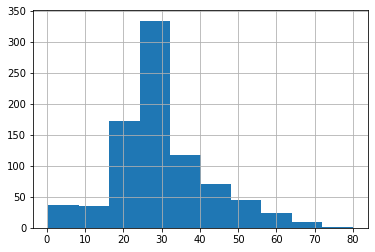

In [944]:
file['Age'].hist()

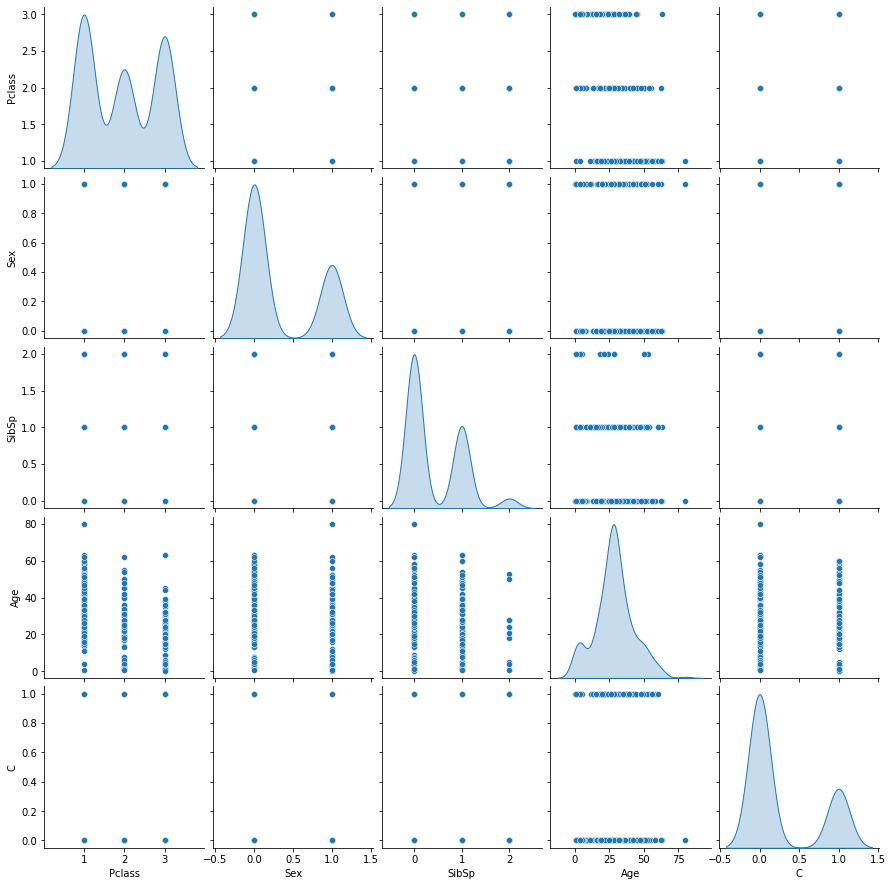

In [945]:
sns.pairplot(file[file['Survived']==1].drop(['Survived'],axis=1),diag_kind = 'kde');

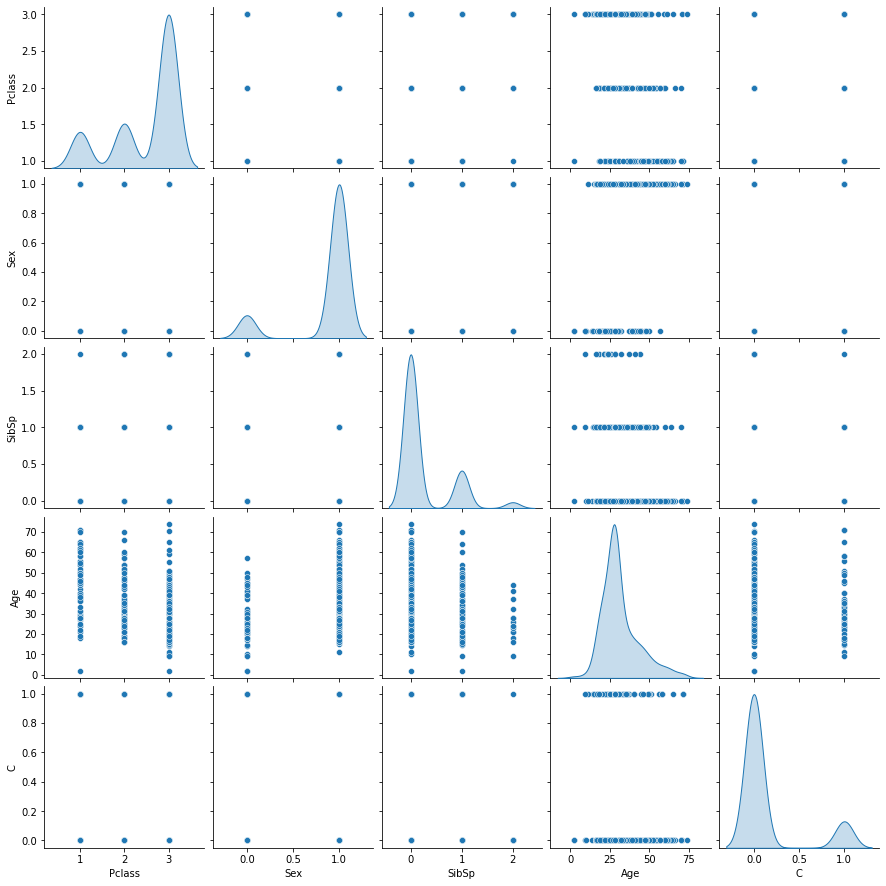

In [946]:
sns.pairplot(file[file['Survived']==0].drop(['Survived'],axis=1),diag_kind = 'kde');

In [947]:
Q1 = file.quantile(0.25)
Q3 = file.quantile(0.75)
IQR = Q3 - Q1

In [948]:
((file < (Q1 - 1.5 * IQR)) | (file > (Q3 + 1.5 * IQR))).sum()

Pclass        0
Sex           0
SibSp         0
Age          60
C           168
Survived      0
dtype: int64

# Support Vector Machine

In [949]:
from sklearn import svm
from scipy.stats import zscore

In [1092]:
X = file.drop(['Survived'],axis=1)
y = file[['Survived']]

## Scaling

In [1093]:
Xscaled = X.apply(zscore)

In [1094]:
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.2,random_state=1)

In [1155]:
#Create a svm Classifier
clf = svm.SVC(gamma= 0.5,C=6,probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_hat = clf.predict(X_test)

### Score

In [1156]:
print("Training score\t:",clf.score(X_train,y_train))
print("Test score\t:",clf.score(X_test,y_test))

Training score	: 0.8505917159763313
Test score	: 0.8106508875739645


In [1157]:
print(metrics.accuracy_score(y_test,y_hat))

0.8106508875739645


### mean accuracy on the given test data and labels.

In [1158]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84        98
           1       0.82      0.70      0.76        71

    accuracy                           0.81       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.81      0.81       169



<AxesSubplot:>

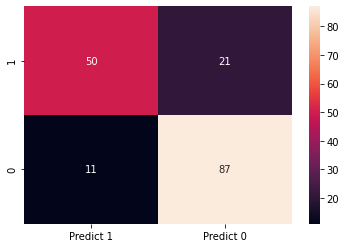

In [1159]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1160]:
y_prob = clf.predict_proba(X_test)[:,1]

In [1161]:
y_prob.shape

(169,)

In [1162]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1163]:
roc_auc = auc(fpr, tpr)

In [1164]:
print(" AUC of ROC = ",roc_auc)

 AUC of ROC =  0.8138832997987927


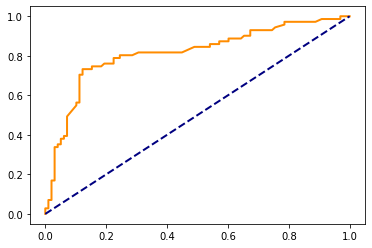

In [1165]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# K Nearest Neighbours

In [1166]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [1167]:
X = file.drop(['Survived'],axis=1)
y = file[['Survived']]

## Scaling

In [1168]:
Xscaled = X.apply(zscore)

In [1169]:
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.2,random_state=1)

In [1195]:
knc = KNC(n_neighbors= 5)
knc.fit(X_train,y_train.values.ravel())

KNeighborsClassifier()

In [1196]:
y_hat = knc.predict(X_test)

### Score

In [1197]:
print("Training score\t:",knc.score(X_train,y_train))
print("Test score\t:",knc.score(X_test,y_test))

Training score	: 0.8313609467455622
Test score	: 0.8047337278106509


In [1198]:
print(metrics.accuracy_score(y_test,y_hat))

0.8047337278106509


### mean accuracy on the given test data and labels.

In [1199]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        98
           1       0.83      0.68      0.74        71

    accuracy                           0.80       169
   macro avg       0.81      0.79      0.79       169
weighted avg       0.81      0.80      0.80       169



<AxesSubplot:>

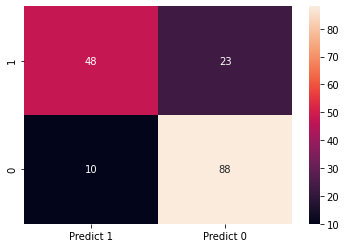

In [1200]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1201]:
y_prob = knc.predict_proba(X_test)[:,1]

In [1202]:
y_prob.shape

(169,)

In [1203]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1204]:
roc_auc = auc(fpr, tpr)

In [1205]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.8377407300948548


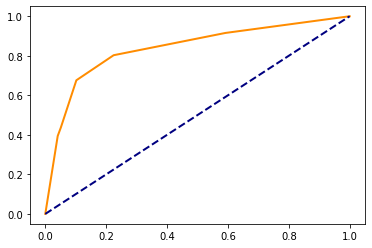

In [1206]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Naive Byes

In [1207]:
from sklearn.naive_bayes import GaussianNB as GNB

In [1208]:
X = file.drop(['Survived'],axis=1)
y = file[['Survived']]

In [1209]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [1210]:
gnbc = GNB()
gnbc.fit(X_train,y_train.values.ravel())

GaussianNB()

In [1211]:
from sklearn import metrics

In [1212]:
y_hat = gnbc.predict(X_test)

In [1213]:
print(metrics.accuracy_score(y_test,y_hat))

0.757396449704142


### mean accuracy on the given test data and labels.

In [1214]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79        98
           1       0.71      0.70      0.71        71

    accuracy                           0.76       169
   macro avg       0.75      0.75      0.75       169
weighted avg       0.76      0.76      0.76       169



<AxesSubplot:>

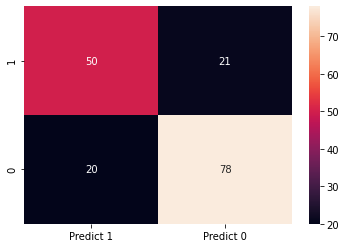

In [1215]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### Score

In [1216]:
print("Training score\t:",gnbc.score(X_train,y_train))
print("Test score\t:",gnbc.score(X_test,y_test))

Training score	: 0.7884615384615384
Test score	: 0.757396449704142


### ROC

In [1217]:
y_prob = gnbc.predict_proba(X_test)[:,1]

In [1218]:
y_prob.shape

(169,)

In [1219]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1220]:
roc_auc = auc(fpr, tpr)

In [1221]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.821356711698764


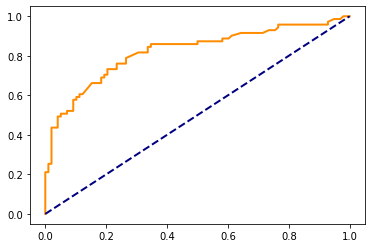

In [1222]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Decision Tree

In [1223]:
from sklearn.tree import DecisionTreeClassifier as DSC

In [1224]:
file2 = file#.drop(['Pclass'],axis=1)

In [1225]:
X = file2.drop(['Survived'],axis=1)
y = file2[['Survived']]

In [1237]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Without Pruning

In [1238]:
dTree = DSC(criterion="entropy",random_state=1)

In [1239]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

### Score

In [1240]:
print("Training score\t:",dTree.score(X_train,y_train))
print("Test score\t:",dTree.score(X_test,y_test))

Training score	: 0.9186390532544378
Test score	: 0.7692307692307693


### Confusion Matrix

In [1241]:
y_hat = dTree.predict(X_test)

In [1242]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        98
           1       0.75      0.68      0.71        71

    accuracy                           0.77       169
   macro avg       0.77      0.76      0.76       169
weighted avg       0.77      0.77      0.77       169



<AxesSubplot:>

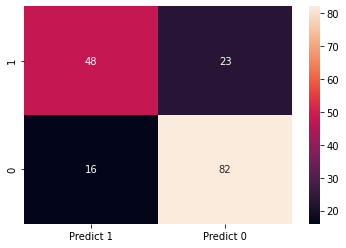

In [1243]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1244]:
y_prob = dTree.predict_proba(X_test)[:,1]

In [1245]:
y_prob.shape

(169,)

In [1246]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1247]:
roc_auc = auc(fpr, tpr)

In [1248]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.774360448404714


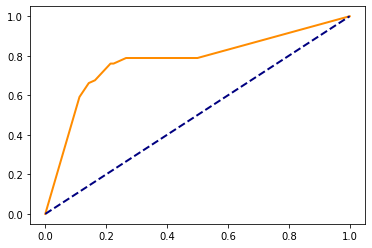

In [1249]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

## Regularized

In [1265]:
dTreeR = DSC(criterion="gini",max_depth=3,random_state=1)

In [1266]:
dTreeR.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

### Score

In [1267]:
print("Training score\t:",dTreeR.score(X_train,y_train))
print("Test score\t:",dTreeR.score(X_test,y_test))

Training score	: 0.8328402366863905
Test score	: 0.8106508875739645


### Confusion Matrix

In [1268]:
y_hat = dTreeR.predict(X_test)

In [1269]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84        98
           1       0.82      0.70      0.76        71

    accuracy                           0.81       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.81      0.81       169



<AxesSubplot:>

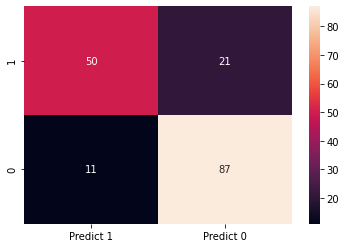

In [1270]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1271]:
y_prob = dTreeR.predict_proba(X_test)[:,1]

In [1272]:
y_prob.shape

(169,)

In [1273]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1274]:
roc_auc = auc(fpr, tpr)

In [1275]:
print("for pruned decision tree, AUC of ROC = ",roc_auc)

for pruned decision tree, AUC of ROC =  0.8372377119862029


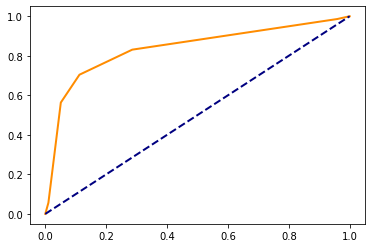

In [1276]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Bagging

In [1277]:
from sklearn.ensemble import BaggingClassifier as BC

In [1293]:
bgcl = BC(n_estimators=50,base_estimator = DSC(criterion="entropy",max_depth=4,random_state=1),random_state=1)

In [1294]:
bgcl.fit(X_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=1),
                  n_estimators=50, random_state=1)

### Score

In [1295]:
print("Training score\t:",bgcl.score(X_train,y_train))
print("Test score\t:",bgcl.score(X_test,y_test))

Training score	: 0.834319526627219
Test score	: 0.8106508875739645


### Confusion Matrix

In [1296]:
y_hat = bgcl.predict(X_test)

In [1297]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84        98
           1       0.82      0.70      0.76        71

    accuracy                           0.81       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.81      0.81       169



<AxesSubplot:>

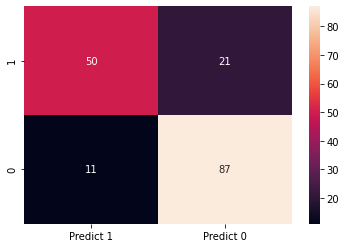

In [1298]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1299]:
y_prob = bgcl.predict_proba(X_test)[:,1]

In [1300]:
y_prob.shape

(169,)

In [1301]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1302]:
roc_auc = auc(fpr, tpr)

In [1303]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.8297643000862317


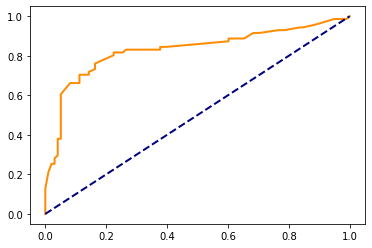

In [1304]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# ADABoosting

In [1305]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [1357]:
abcl = ABC(n_estimators=50,base_estimator = DSC(criterion="entropy",max_depth=2,random_state=1),random_state=1)

In [1358]:
abcl.fit(X_train,y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=2,
                                                         random_state=1),
                   random_state=1)

### Score

In [1359]:
print("Training score\t:",abcl.score(X_train,y_train))
print("Test score\t:",abcl.score(X_test,y_test))

Training score	: 0.8742603550295858
Test score	: 0.8165680473372781


### Confusion Matrix

In [1360]:
y_hat = abcl.predict(X_test)

In [1361]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        98
           1       0.79      0.76      0.78        71

    accuracy                           0.82       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.82      0.82      0.82       169



<AxesSubplot:>

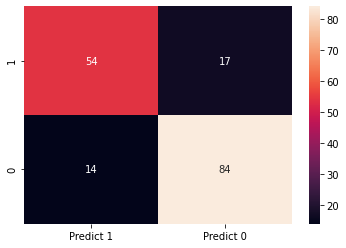

In [1362]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1363]:
y_prob = abcl.predict_proba(X_test)[:,1]

In [1364]:
y_prob.shape

(169,)

In [1365]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1366]:
roc_auc = auc(fpr, tpr)

In [1367]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.851034780109227


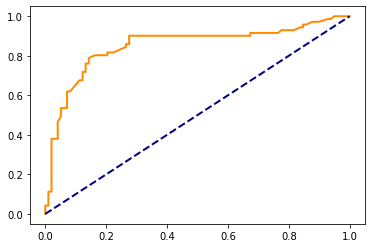

In [1368]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Random Forest

In [1369]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [1370]:
rfcl = RFC(n_estimators=50,max_depth=5,max_features = 3,random_state=1)

In [1371]:
rfcl.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=5, max_features=3, n_estimators=50,
                       random_state=1)

### Score

In [1372]:
print("Training score\t:",rfcl.score(X_train,y_train))
print("Test score\t:",rfcl.score(X_test,y_test))

Training score	: 0.8461538461538461
Test score	: 0.8106508875739645


### Confusion Matrix

In [1373]:
y_hat = rfcl.predict(X_test)

In [1374]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84        98
           1       0.82      0.70      0.76        71

    accuracy                           0.81       169
   macro avg       0.81      0.80      0.80       169
weighted avg       0.81      0.81      0.81       169



<AxesSubplot:>

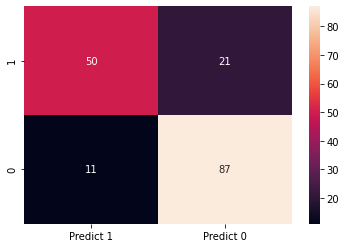

In [1375]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1376]:
y_prob = rfcl.predict_proba(X_test)[:,1]

In [1377]:
y_prob.shape

(169,)

In [1378]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1379]:
roc_auc = auc(fpr, tpr)

In [1380]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.834507042253521


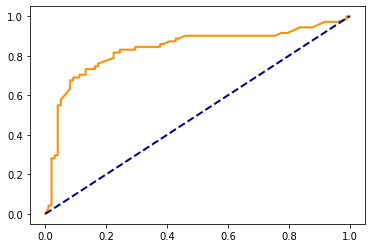

In [1381]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Gradient Boosting

In [1382]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [1406]:
gbcl = GBC(n_estimators=100,max_depth=4, max_features=4,random_state=1)

In [1407]:
gbcl.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(max_depth=4, max_features=4, random_state=1)

### Score

In [1408]:
print("Training score\t:",gbcl.score(X_train,y_train))
print("Test score\t:",gbcl.score(X_test,y_test))

Training score	: 0.8964497041420119
Test score	: 0.834319526627219


### Confusion Matrix

In [1409]:
y_hat = gbcl.predict(X_test)

In [1410]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        98
           1       0.82      0.77      0.80        71

    accuracy                           0.83       169
   macro avg       0.83      0.83      0.83       169
weighted avg       0.83      0.83      0.83       169



<AxesSubplot:>

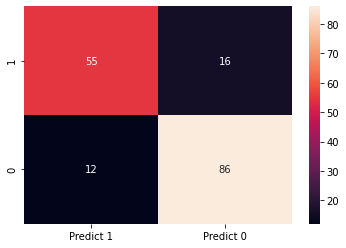

In [1411]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1412]:
y_prob = gbcl.predict_proba(X_test)[:,1]

In [1413]:
y_prob.shape

(169,)

In [1414]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1415]:
roc_auc = auc(fpr, tpr)

In [1416]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.8519689565967232


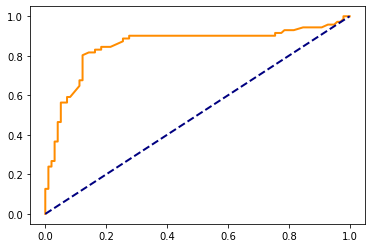

In [1417]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Logistic Regression

In [1418]:
file2 = file#.drop(['Pclass'],axis=1)

In [1419]:
X = file2.drop(['Survived'],axis=1)
y = file2[['Survived']]

In [1420]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [1421]:
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [1422]:
y_hat = reg_model.predict(X_test)

### mean accuracy on the given test data and labels.

#### For train data

In [1423]:
reg_model.score(X_train,y_train)

0.8062130177514792

#### For test data

In [1424]:
reg_model.score(X_test,y_test)

0.7988165680473372

In [1425]:
from sklearn import metrics

In [1426]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        98
           1       0.81      0.68      0.74        71

    accuracy                           0.80       169
   macro avg       0.80      0.78      0.79       169
weighted avg       0.80      0.80      0.80       169



<AxesSubplot:>

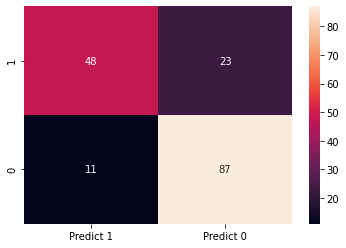

In [1427]:
cm = metrics.confusion_matrix(y_test,y_hat,labels=[1,0]);
df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot = True,fmt = 'g')

### ROC

In [1428]:
y_prob = reg_model.predict_proba(X_test)[:,1]

In [1429]:
y_prob.shape

(169,)

In [1430]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

In [1431]:
roc_auc = auc(fpr, tpr)

In [1432]:
print("AUC of ROC = ",roc_auc)

AUC of ROC =  0.8406151192871514


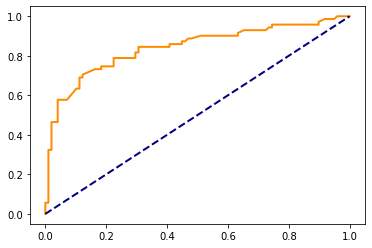

In [1433]:
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Conclusion
Gradient Boosting has been the best model

Other than this, the following models have achieved test scores > 0.81:
- Regularized Decision Tree
- KNN
- Bagging
- Adaboosting
- Random Forest

